In [1]:
import numpy as np

In [2]:
points_in = np.load('in.npy')
points_x = np.load('x.npy')
points_y = np.load('y.npy')

In [3]:
points_in_y, points_in_x = np.where(points_in==True)

In [4]:
import matplotlib.pyplot as plt

In [5]:
true_list = list(zip(points_in_y, points_in_x))

In [7]:
cost_map_temp = np.where(np.pad(points_in,1) == False, 8, 0)

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 0, ..., 0, 0, 8],
       ...,
       [8, 8, 0, ..., 0, 0, 8],
       [8, 8, 0, ..., 0, 0, 8],
       [8, 8, 8, ..., 8, 8, 8]])

In [7]:
def neighbor_element(y, x, array):
    shape_y, shape_x = array.shape
    
    slice_y_max = min(y + 2, shape_y)
    slice_x_max = min(x + 2, shape_x)
    
    slice_y_min = max(y - 1, 0)
    slice_x_min = max(x - 1, 0)    
    return array[slice_y_min:slice_y_max, slice_x_min:slice_x_max] 

In [8]:
cost_map = cost_map_temp.copy()
true_y, true_x = np.where(cost_map_temp==0)
for y, x in zip(true_y, true_x):
    cost_map[y][x] = np.sum(
            neighbor_element(y, x, cost_map_temp) == 8
    )
cost_map = cost_map[1:-1, 1:-1]

In [9]:
def walk_through(y, x, array):
    window = neighbor_element(y, x, array)
    window += 1
    array[y][x] =8
#     window[1][1] = 8

    walk_able8 = np.where(window<8)
    walk_able4 = [(yy, xx) for yy, xx in zip(walk_able8[0], walk_able8[1]) if (yy+y-1 == y or xx+x-1 == x)]
    
    
    if walk_able4:
        costs = [window[yy][xx] for yy, xx in walk_able4]
        index = costs.index(max(costs))
        return walk_able4[index][0]+y-1, walk_able4[index][1]+x-1
    else:
        return None, None

In [10]:
now_y, now_x = true_list[0]
path_x = []
path_y = []
while true_list:
    next_y, next_x = walk_through(now_y, now_x, cost_map)
    path_y.append(points_y[now_y][now_x])
    path_x.append(points_x[now_y][now_x])
    true_list.remove((now_y, now_x))
    if (next_y or next_x) is None:
        try:
            now_y, now_x = true_list[0]
        except:
            pass
    else:
        now_y, now_x = next_y, next_x

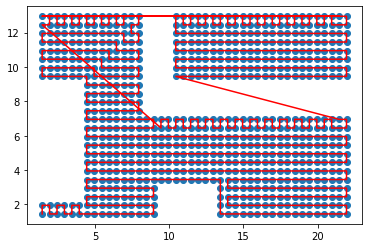

In [11]:
plt.plot(path_x, path_y, 'r')
plt.scatter(path_x, path_y)
plt.savefig('path', dpi=200)

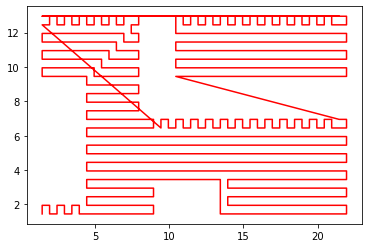

In [12]:
plt.plot(path_x, path_y, 'r')